In [2]:
surname = "Новиков"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  1
Задача № 1, шаг 11 - вариант:  2
задача № 2 - вариант:  4


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Согласно заданию необходимо:
    
1. Загрузить данные в `DataFrame`

In [32]:
# Загружаем данные
df1 = pd.read_excel("./data/wgidataset.xlsx")

2. Отсоровать данные по убыванию `pctrank`

In [33]:
# Оставляем только нужные столбцы
df2 = df1[['pctrank', 'estimate', 'year', 'countryname']]
# Оставляем только данные за 2023 год
df2 = df2[df1['year'] == 2023]

# Заменяем все значения ".." на NaN
df2['pctrank'] = df2['pctrank'].replace('..', pd.NA)
# Удаляем строки с NaN в pctrank
df2 = df2.dropna(subset=['pctrank'])
# Сортируем по столбцу `pctrank` (по возрастанию)
df2.sort_values('pctrank', ascending=False, inplace=True)

3. Отобразите данные по индексу *WGI* за 2023 год в виде горизонтального столбчатого графика (`pctrank`).

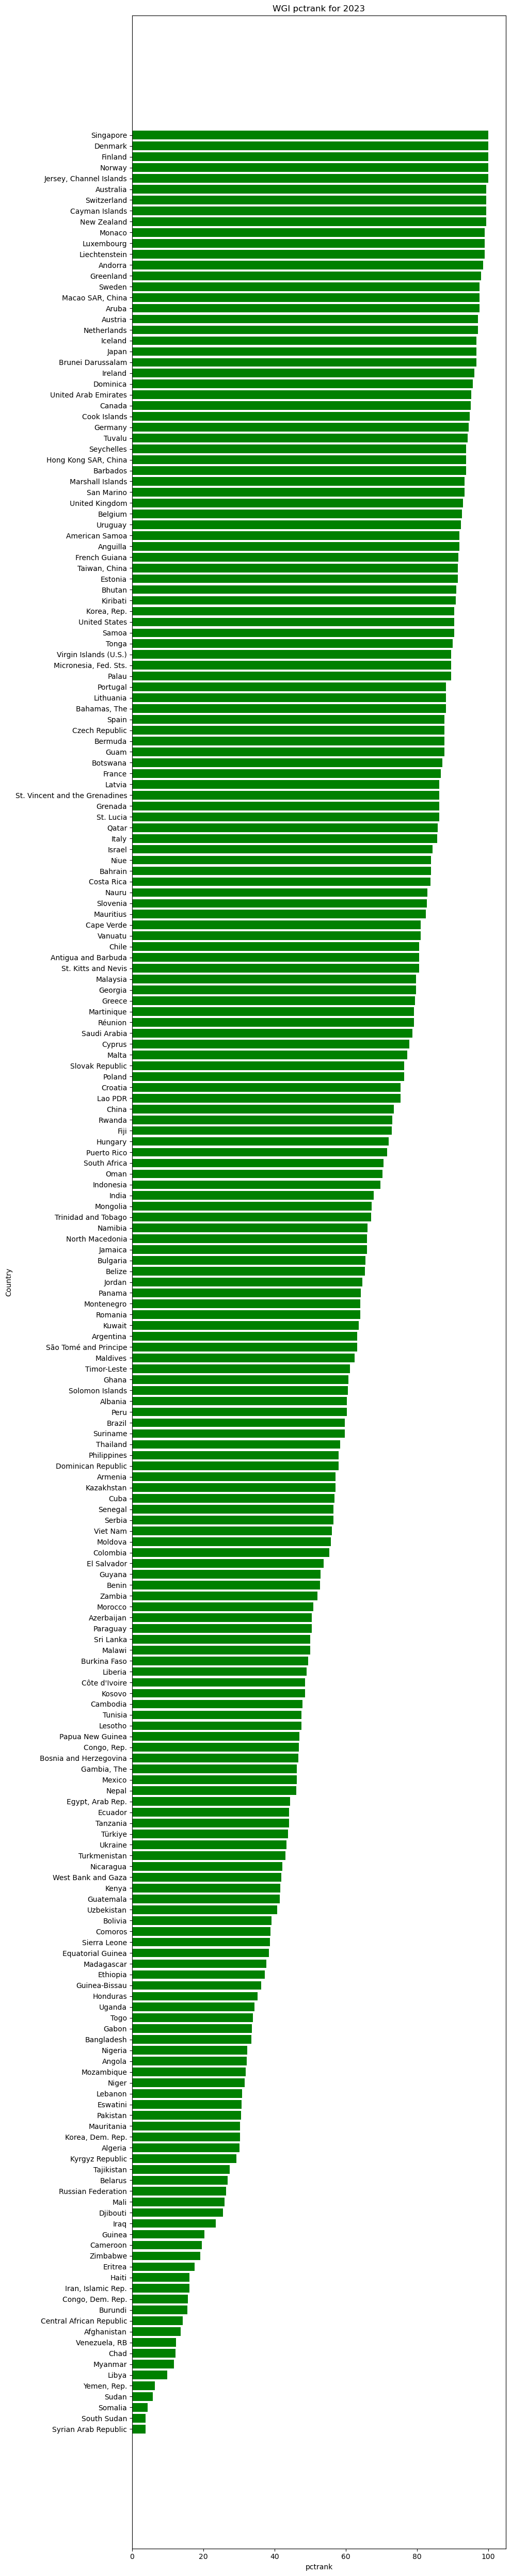

In [34]:
# Строим горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 50))
plt.barh(df2['countryname'], df2['pctrank'], color='green')

# Инвертируем ось Y, чтобы лучшие были сверху
plt.gca().invert_yaxis()

# Подписываем оси
plt.xlabel("pctrank")
plt.ylabel("Country")
plt.title("WGI pctrank for 2023")

# Показываем график
plt.tight_layout()
plt.show()